In [1]:
'''Importing necessary libraries'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
'''Reading dataset using pandas'''
iris = pd.read_csv("IRIS.csv")

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
'''Knowing size of dataset'''
iris.shape

(150, 5)

In [5]:
'''Knowing the counts of each class'''
iris["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

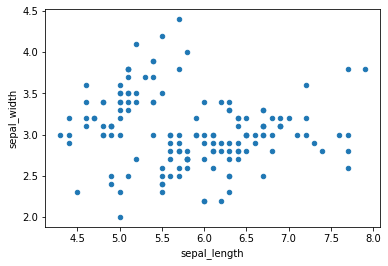

In [6]:
'''Scatter plot between sepal length and sepal width'''
iris.plot(kind="scatter",x="sepal_length",y="sepal_width")
plt.show()

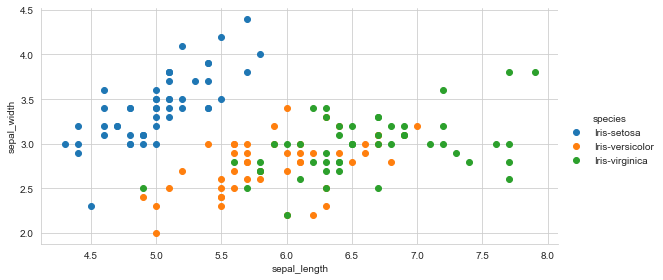

'Observation : Setosa can be distinguised easily using sepal length and width ( i.e Linearly Seperable)\n                 Virginica and versicolor can not be distinguished easily as they have ovelapping features.'

In [7]:
'''Using Seaborn to style above plot and take out infrence from it.'''
sns.set_style('whitegrid');
sns.FacetGrid(iris,hue="species",height=4,aspect=2).map(plt.scatter,"sepal_length","sepal_width").add_legend();
plt.show();

'''Observation : Setosa can be distinguised easily using sepal length and width ( i.e Linearly Seperable)
                 Virginica and versicolor can not be distinguished easily as they have ovelapping features.'''

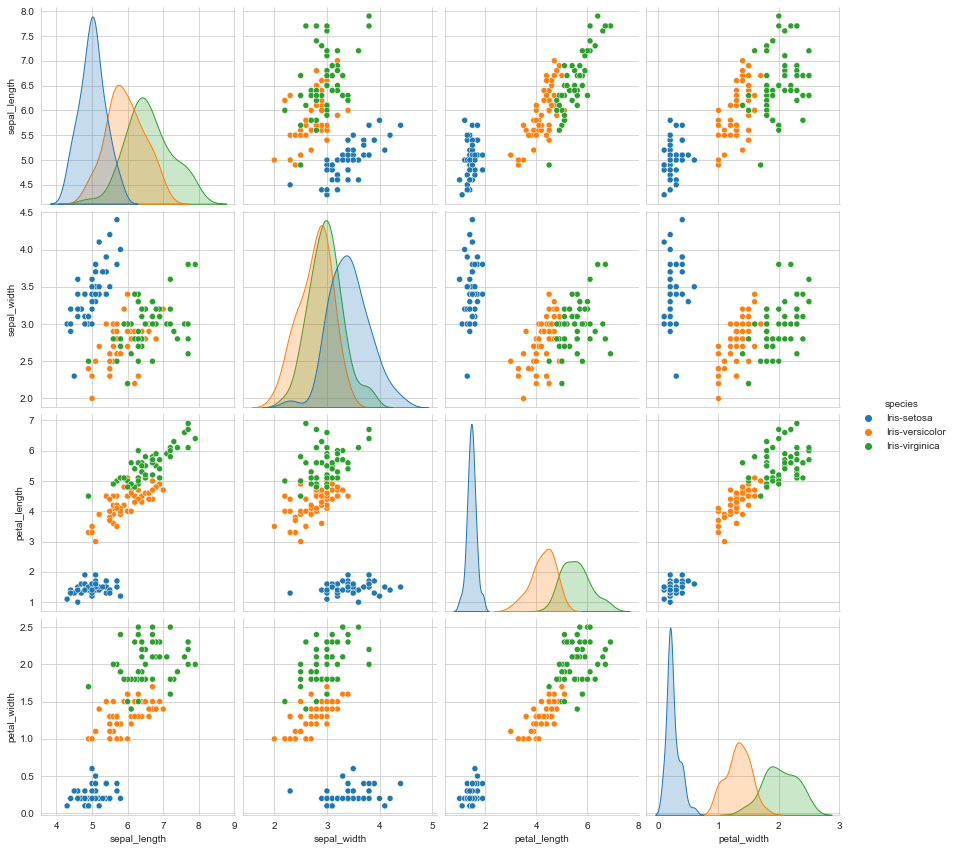

"Observations:Petal length and width are more useful features to distribute flowers in compare to sepal length and width\n                If Else Conditions can be used to build the Model\n                LIMITATION : When Dimensions are higher we can't use it , We should use this when less dimensions"

In [8]:
'''Pair Plot to observe relation between each features.'''
plt.close();
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",height=3)
plt.show()

'''Observations:Petal length and width are more useful features to distribute flowers in compare to sepal length and width
                If Else Conditions can be used to build the Model
                LIMITATION : When Dimensions are higher we can't use it , We should use this when less dimensions'''

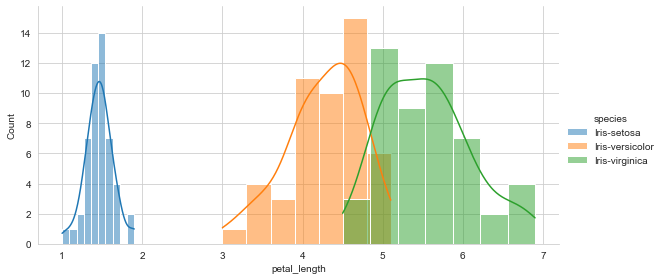

'Histograms and PDF(Probability Density Functions) shows us density which can be used to build our models\nBut still we cannot distribute them equally\nWe can use them when we need to find which feature has the most impact on the classification(i.e Univariate Analysis)'

In [10]:
'''Ploting histogram and Probability distribution fuction using Seaborn'''
plt.close();
sns.FacetGrid(iris,hue="species",height=4,aspect=2).map(sns.histplot,"petal_length",kde=True).add_legend()
plt.show()

'''Histograms and PDF(Probability Density Functions) shows us density which can be used to build our models
But still we cannot distribute them equally
We can use them when we need to find which feature has the most impact on the classification(i.e Univariate Analysis)'''

In [11]:
'''Divding dataset according to class.'''
iris_setosa=iris[iris['species']=="Iris-setosa"]
iris_virginica=iris[iris['species']=="Iris-virginica"]
iris_versicolor=iris[iris['species']=="Iris-versicolor"]
iris_setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


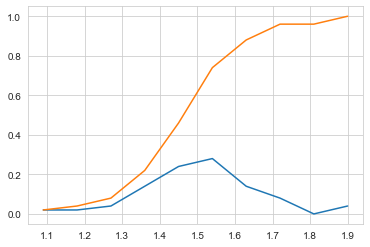

In [12]:
'''We can use Cummulative Distribution Function (CDF) to find probabilities of each class and various Datapoints'''
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.show();

In [13]:
print("Means:")
print("Setosa ",np.mean(iris_setosa['petal_length']))
print("Virginica ",np.mean(iris_virginica['petal_length']))
print("Versicolor ",np.mean(iris_versicolor['petal_length']))
'''Observation: By seeing only mean of petal length we can say that petal length of setosa is far less than other two.'''

'''Standard Deviation denotes how much is the spread of the Datapoints'''
print("Standard Deviation:")
print("Setosa ",np.std(iris_setosa['petal_length']))
print("Virginica ",np.std(iris_virginica['petal_length']))
print("Versicolor ",np.std(iris_versicolor['petal_length']))

Means:
Setosa  1.464
Virginica  5.5520000000000005
Versicolor  4.26
Standard Deviation:
Setosa  0.17176728442867112
Virginica  0.546347874526844
Versicolor  0.4651881339845203


In [14]:
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
print(np.median(np.append(iris_setosa["petal_length"],50))," With an Outlier");
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


'''Quantiles shows us value which depicts 25% of observation have values less than x'''
print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))


from statsmodels import robust
print("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))


Medians:
1.5
1.5  With an Outlier
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


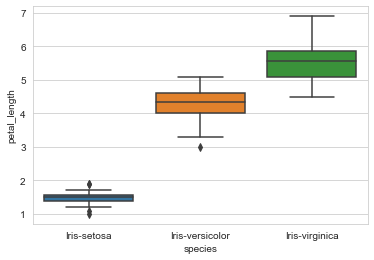

In [15]:
'''Box plot is used to find outliners in dataset'''
sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()

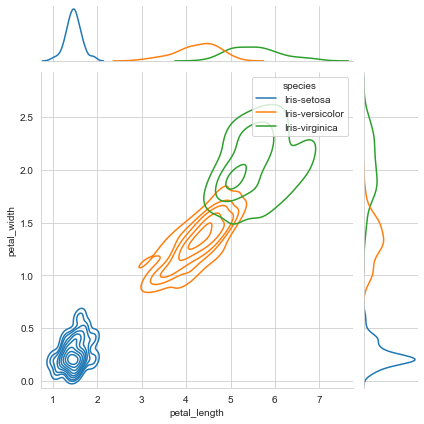

In [17]:
sns.jointplot(x="petal_length",y="petal_width",data=iris,kind="kde",hue="species")
plt.show()